In [2]:
import scipy as sp, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd

In [3]:
bioconda = 6819
conda = 62205
pip = 186000
apt = 51000
easybuild = 1808
gnuguix = 9789
linuxbrew = 251
spack = 2907
cran = 16200
bioconductor = 1741

labels = ["bioconda", "conda","pip", "apt", "easybuild", "gnuguix", "linuxbrew", "spack", "cran", "bioconductor"]
num_packages = [bioconda,conda, pip, apt, easybuild, gnuguix, linuxbrew, spack, cran, bioconductor]
types = ["centralized", "centralized", "centralized", "centralized", "distributed","distributed","centralized","distributed", "centralized", "centralized"] 
         

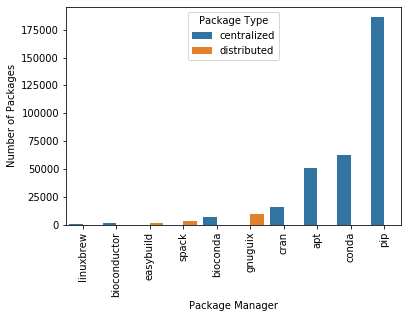

In [4]:
df = pd.DataFrame({
    'Name': labels,
    'Number of Packages': num_packages,
    'Package Type': types
})

# df_overlay = pd.DataFrame({
#     'Name': labels,
#     'Number of Packages': []
# })

result = df.groupby(['Name'])['Number of Packages'].aggregate(np.median).reset_index().sort_values('Number of Packages')
ax = sns.barplot(x='Name',y='Number of Packages', data=df, order=result['Name'], hue = 'Package Type')

figure1 = ax.get_figure()
figure1.savefig('package manager bar plot.png', dpi = 1000, bbox_inches = 'tight')
plt.ylabel('Number of Packages')
plt.xlabel('Package Manager')
font = {'size'   : 10,
       'family' : 'monospace'}

plt.rc('font', **font)

for item in ax.get_xticklabels():
    item.set_rotation(90)

figure1 = ax.get_figure()
figure1.savefig('package manager bar plot.png', dpi = 1000, bbox_inches = 'tight')

#diffrentiate centralized & distributed 

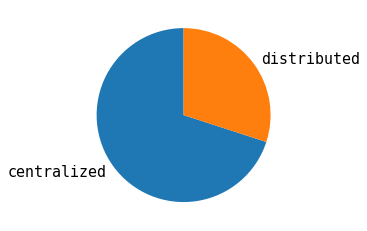

In [14]:
types = ["centralized", "distributed"]
sizes = [7,3]

fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=types, startangle=90);
font = {'size'   : 15,
       'family' : 'monospace'}

plt.rc('font', **font)

piechart = ax1.get_figure()
piechart.savefig('package manager pie chart.png', dpi = 1000, bbox_inches = 'tight')

In [6]:
google_data = pd.read_csv("all-google.csv")

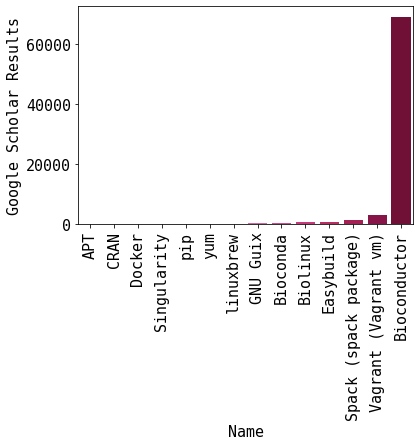

In [7]:
result = google_data.groupby(['Name'])['Google Scholar Results'].aggregate(np.median).reset_index().sort_values('Google Scholar Results')
ax2 = sns.barplot(data = google_data, x = 'Name', y = 'Google Scholar Results', palette="PuRd", order=result['Name'])

for item in ax2.get_xticklabels():
    item.set_rotation(90)
    
piechart = ax2.get_figure()
piechart.savefig('scholar-res.png', dpi = 1000, bbox_inches = 'tight')

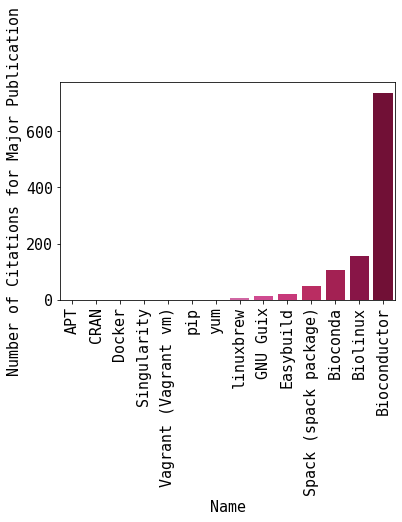

In [8]:
result = google_data.groupby(['Name'])['Citations'].aggregate(np.median).reset_index().sort_values('Citations')
ax3=sns.barplot(data = google_data, x = 'Name', y = 'Citations', palette="PuRd", order=result['Name'])

for item in ax3.get_xticklabels():
    item.set_rotation(90)
ax3.set(ylabel = 'Number of Citations for Major Publication')
piechart = ax3.get_figure()
piechart.savefig('citations.png', dpi = 1000, bbox_inches = 'tight')

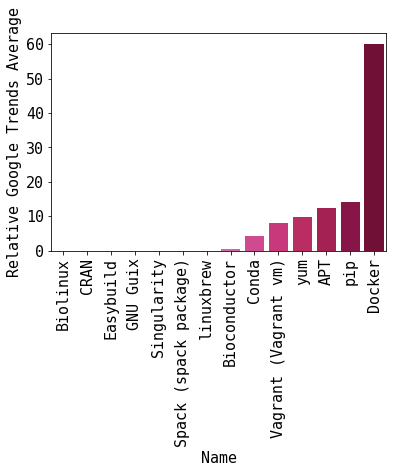

In [9]:
result = google_data.groupby(['Name'])['Trends'].aggregate(np.median).reset_index().sort_values('Trends')
result.replace({'Bioconda':'Conda'}, inplace=True)

ax4 = sns.barplot(data = result, x = 'Name', y = 'Trends', palette="PuRd", order=result['Name'])

for item in ax4.get_xticklabels():
    item.set_rotation(90)
ax4.set(ylabel = 'Relative Google Trends Average')
piechart = ax4.get_figure()
piechart.savefig('trends.png', dpi = 1200, bbox_inches = 'tight')


In [10]:
df = pd.read_csv('fig1.csv')
df

,Name,Year,Type
0,Bioconda,2015,package manager
1,pip,2008,package manager
2,APT,1998,package manager
3,Easybuild,2012,package manager
4,GNU Guix,2013,package manager
5,linuxbrew,2009,package manager
6,Spack,2013,package manager
7,yum,1999,package manager
8,CRAN,1993,package manager
9,Bioconductor,2001,package manager


Text(0.5, 1.0, 'Release Dates')

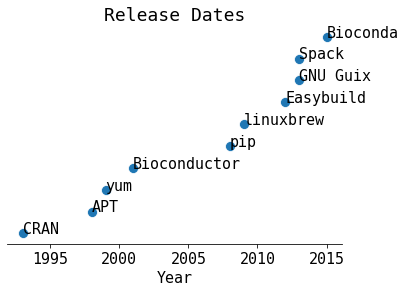

In [11]:
yax = np.arange(0,10)

result = df.groupby(['Name'])['Year'].aggregate(np.median).reset_index().sort_values('Year')
df2 = result
#df2['Type'] = df[['Type']]
p1 = sns.scatterplot(x='Year', y=yax, data = df2, s=100, palette='hls');

names=df2[['Name']]

years=df2[['Year']]

ylines = np.arange(1,11)
lines = [3,0,9,2,8,7,4,5,6,1]

j = 0
for line in lines:
    p1.text(df2.Year[line], ylines[j]-1, df2.Name[line])
    j = j+1
sns.despine(ax=p1)
p1.spines['left'].set_visible(False)
p1.axes.get_yaxis().set_visible(False)
p1.set_title('Release Dates')

In [12]:
figure1 = p1.get_figure()
figure1.savefig('figure1.png', dpi = 1000, bbox_inches = 'tight')

In [13]:
df2

,Name,Year
3,CRAN,1993
0,APT,1998
9,yum,1999
2,Bioconductor,2001
8,pip,2008
7,linuxbrew,2009
4,Easybuild,2012
5,GNU Guix,2013
6,Spack,2013
1,Bioconda,2015
